<h1>TCEQ Site Drawing</h1>

This notebook takes the GPS coordinates from the TCEQ monitoring sites, plots them on a map, and colors them with the relvant metrics measured at those locations.

In [20]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Example Pie-Chart Markers
Code is taken from [here](https://matplotlib.org/3.1.0/gallery/lines_bars_and_markers/scatter_piecharts.html) and helps to create pie-chart markers similar to what the TCEQ does for their ArcGIS maps. 

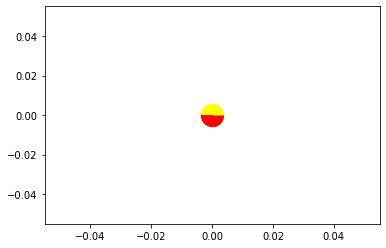

In [58]:
# first define the ratios
r1 = 0.5       # 20%

# define some sizes of the scatter marker
sizes = np.array([60, 80, 120])

# calculate the points of the first pie marker
# these are just the origin (0, 0) + some (cos, sin) points on a circle
x1 = np.cos(2 * np.pi * np.linspace(0, r1))
y1 = np.sin(2 * np.pi * np.linspace(0, r1))
xy1 = np.row_stack([[0, 0], np.column_stack([x1, y1])])
s1 = np.abs(xy1).max()

x2 = np.cos(2 * np.pi * np.linspace(r1, 1))
y2 = np.sin(2 * np.pi * np.linspace(r1, 1))
xy2 = np.row_stack([[0, 0], np.column_stack([x2, y2])])
s2 = np.abs(xy2).max()

fig, ax = plt.subplots()
ax.scatter(range(1), range(1), marker=xy1, s=500, facecolor='yellow')
ax.scatter(range(1), range(1), marker=xy2, s=500, facecolor='red')

plt.show()
plt.close()

## Creating the Map

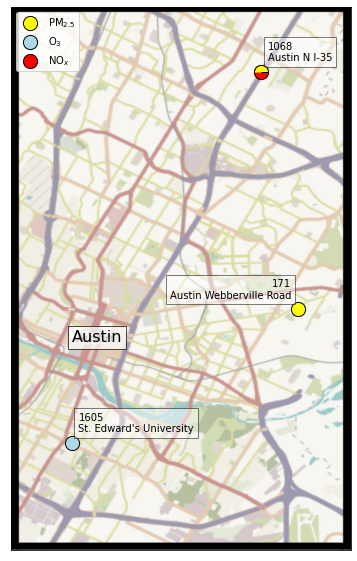

In [57]:
# setting perimeter bounds
BBox = (-97.7694,-97.6637,30.2051,30.3741)
# stations are [Austin Webberville Road, St. Edwards, Austin N I-35]
lats = [30.280107498168945,30.2385208,30.3538600]
longs = [-97.6800537109375,-97.7504602,-97.6916600]
x_width = BBox[1]-BBox[0]
y_width = BBox[3]-BBox[2]
austin_m = plt.imread('../images/tceq_map.png')
fig, ax = plt.subplots(figsize = (10,10))
# plotting points
ax.scatter(longs[0], lats[0], zorder=1, alpha= 1, c='yellow', edgecolors='black', s=200,label='PM$_{2.5}$')
ax.scatter(longs[1], lats[1], zorder=1, alpha= 1, c='lightblue', edgecolors='black', s=200, label='O$_3$')
ax.scatter(longs[2], lats[2], marker=xy1, zorder=10, s=200, facecolor='yellow', edgecolors='black')
ax.scatter(longs[2], lats[2], s=200, facecolor='red', edgecolors='black',label='NO$_x$')
# Adding text
station_nos = ['171','1605','1068']
station_names = ['Austin Webberville Road','St. Edward\'s University','Austin N I-35']
for i in range(3):
    if i == 0:
        t = ax.text(longs[i]-0.02*x_width,lats[i]+0.02*y_width,station_nos[i]+'\n'+station_names[i],ha='right')
    else:
        t = ax.text(longs[i]+0.02*x_width,lats[i]+0.02*y_width,station_nos[i]+'\n'+station_names[i])
        
    t.set_bbox(dict(facecolor='white', alpha=0.5, edgecolor='black'))
# formatting remainder
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])
ax.set_yticks([])
ax.set_xticks([])
ax.imshow(austin_m, zorder=0, extent = BBox, aspect= 'equal')
ax.legend(loc='upper left')
# removing blurred austin
t = ax.text(longs[1],30.27,'Austin',fontsize=16)
t.set_bbox(dict(facecolor='white', alpha=0.7, edgecolor='black'))

plt.savefig('../images/tceq_sites.pdf',bbox_inches='tight')
plt.show()
plt.close()